<h1><center><font size="6">Classification</font></center></h1>



In your second homework you need to create a model that predicts which passengers survived the Titanic shipwreck.

In [2]:
import pandas as pd
import numpy as np
import datetime
import sys
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
display(train_df.head(1))
test_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


# <a id='3'>Data exploration</a>  

We check the shape of train and test dataframes and also show a selection of rows, to have an initial understanding of the data.



In [158]:
train_df.sample(5).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.550,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.050,NaN,C
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.000,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.100,NaN,S


In [159]:
test_df.sample(5).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
170,1062,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.5500,NaN,S
389,1281,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
108,1000,3,"Willer, Mr. Aaron (Abi Weller"")""",male,NaN,0,0,3410,8.7125,NaN,S
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C
304,1196,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q


In [160]:
print("Train: rows:{} cols:{}".format(train_df.shape[0], train_df.shape[1]))
print("Test:  rows:{} cols:{}".format(test_df.shape[0], test_df.shape[1]))

Train: rows:891 cols:12
Test:  rows:418 cols:11


Both **train** and **test** files contains the following values:  

* **PassengerID** - the index of the passenger (in the dataset);  
* **PClass** - the class of the passenger (from 1 to 3);
* **Name** - the name of the passenger;
* **Sex** - the sex of the passenger (female or male);  
* **Age** - the age (where available) of the passenger;  
* **SibSp** - the number of sibilings / spouses aboard of Titanic;  
* **Parch** - the number of parents / children aboard of Titanic;  
* **Ticket** - the ticket number;  
* **Fare** - the passenger fare (ticket cost);  
* **Cabin** - the cabin number;  
* **Embarked** - the place of embarcation of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).  

The **train** data has as well the target value, **Survived**.

It is important to have a good understanding of the data before going to create a model. Therefore we will explore the features.

Let's start by checking if there are missing data and unlabeled data.

Next, analyze the dependencies of the target variable on various features, such as Age, Sex, and so on, using approaches similar to those in the first homework.

Draw conclusions about what affects whether the passenger survives, check the distribution of features in the train and test data. 

In [161]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have Age, Cabin, Embarked where we have missing values

In [162]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have missing values in test_df: Age, cabin, fare

,Sex,count,percentage
0,male,577,64.758698
1,female,314,35.241302


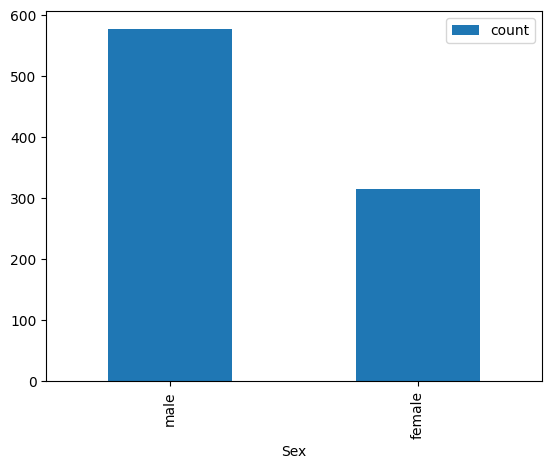

In [163]:
sex_dist = pd.DataFrame(train_df['Sex'].value_counts())
sex_dist['percentage'] = sex_dist / len(train_df) * 100
sex_dist.reset_index(inplace=True)
sex_dist.plot(x = 'Sex', y = 'count', kind = 'bar')
sex_dist

In [164]:
s_sex = train_df.groupby('Sex', as_index=False)['Survived'].value_counts()
s_sex

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


In [165]:
female_percentage = ((s_sex[(s_sex['Sex'] == 'female') & (s_sex['Survived'] == 1)]['count']) / s_sex[s_sex['Sex'] == 'female']['count'].sum()).iloc[0] * 100
male_percentage = ((s_sex[(s_sex['Sex'] == 'male') & (s_sex['Survived'] == 1)]['count']) / s_sex[s_sex['Sex'] == 'male']['count'].sum()).iloc[0] * 100
print(f'{female_percentage:.2f}% of female survived')
print(f'{male_percentage:.2f}% of male survived')

74.20% of female survived
18.89% of male survived


<BarContainer object of 2 artists>

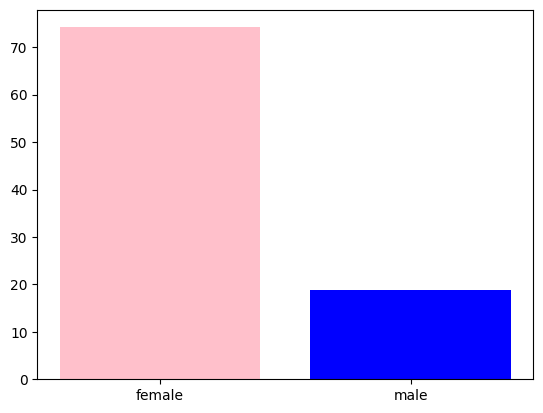

In [166]:
data = {'Sex': ['female', 'male'],
        'Survived': [female_percentage, male_percentage]}
df_survival_percentage = pd.DataFrame(data)
plt.bar(df_survival_percentage['Sex'], df_survival_percentage['Survived'], color=['pink', 'blue'])

,Pclass,count,percentage
0,3,491,55.106622
1,1,216,24.242424
2,2,184,20.650954


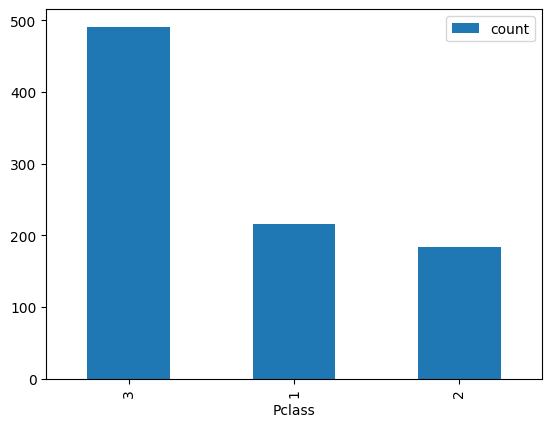

In [167]:
pclass_dist = pd.DataFrame(train_df['Pclass'].value_counts())
pclass_dist['percentage'] = pclass_dist / len(train_df) * 100
pclass_dist.reset_index(inplace=True)
pclass_dist.plot(x = 'Pclass', y = 'count', kind = 'bar')
pclass_dist

In [168]:
s_pclass = train_df.groupby('Pclass', as_index=False)['Survived'].value_counts()
s_pclass

,Pclass,Survived,count
0,1,1,136
1,1,0,80
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [169]:
pclass_1 = ((s_pclass[(s_pclass['Pclass'] == 1) & (s_pclass['Survived'] == 1)]['count']) /s_pclass[(s_pclass['Pclass'] == 1)]['count'].sum()).iloc[0] * 100
pclass_2 = ((s_pclass[(s_pclass['Pclass'] == 2) & (s_pclass['Survived'] == 1)]['count'])/s_pclass[(s_pclass['Pclass'] == 2)]['count'].sum()).iloc[0] * 100
pclass_3 = ((s_pclass[(s_pclass['Pclass'] == 3) & (s_pclass['Survived'] == 1)]['count'])/s_pclass[(s_pclass['Pclass'] == 3)]['count'].sum()).iloc[0] * 100
print(f'{pclass_1:.2f}% of first class passengers survived')
print(f'{pclass_2:.2f}% of second class passengers survived')
print(f'{pclass_3:.2f}% of third class passengers survived')

62.96% of first class passengers survived
47.28% of second class passengers survived
24.24% of third class passengers survived


<BarContainer object of 3 artists>

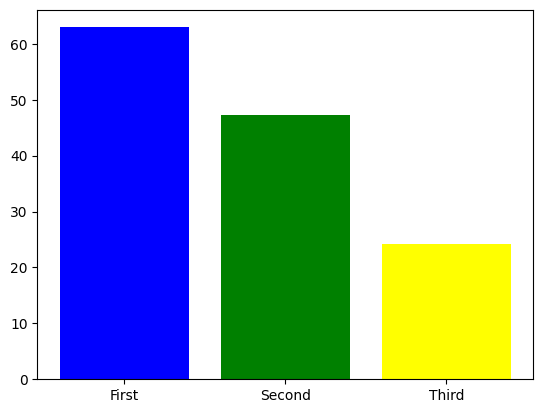

In [170]:
data_pclass = {'Pclass': ['First', 'Second', 'Third'],
        'Survived%': [pclass_1, pclass_2, pclass_3]}
df_survival_percentage_pclass = pd.DataFrame(data_pclass)

# Create a bar chart
plt.bar(df_survival_percentage_pclass['Pclass'], df_survival_percentage_pclass['Survived%'], color=['blue', 'green', 'yellow'])

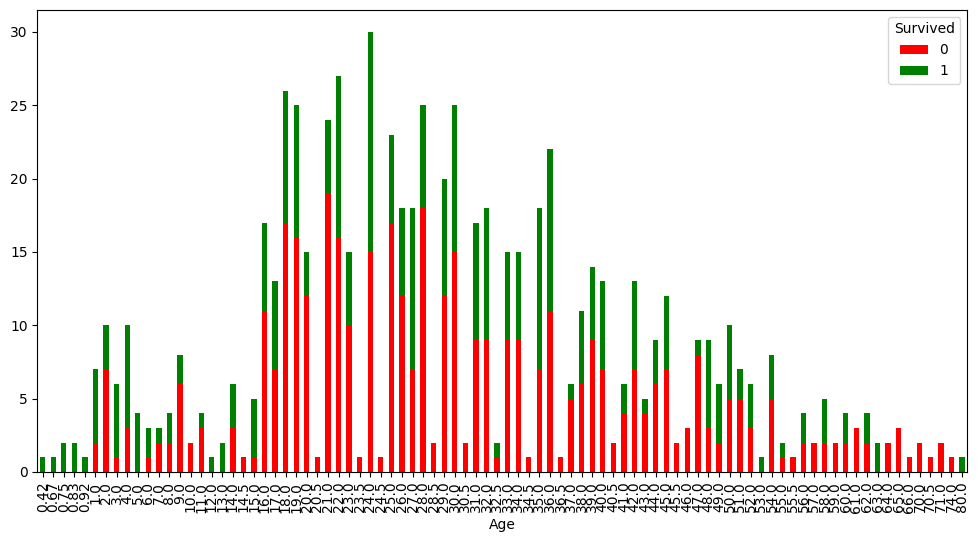

In [171]:
age_survived = train_df.groupby(['Age', 'Survived']).size().unstack()

ax = age_survived.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))

,Embarked,count,percentage
0,S,644,72.278339
1,C,168,18.855219
2,Q,77,8.641975


<Axes: xlabel='Embarked'>

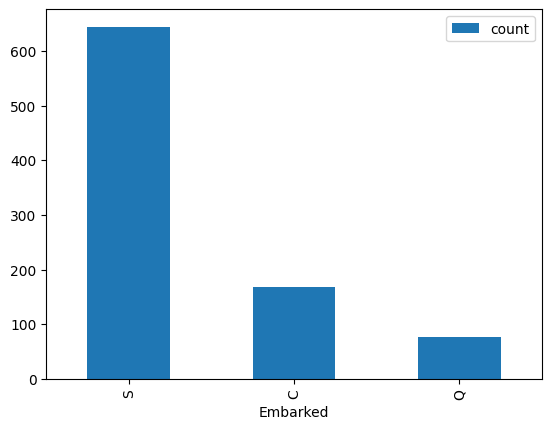

In [172]:
embarked = pd.DataFrame(train_df['Embarked'].value_counts())
embarked['percentage'] = embarked / len(train_df) * 100
embarked.reset_index(inplace=True)
display(embarked)
embarked.plot(x = 'Embarked', y = 'count', kind='bar')

In [173]:
s_embarked = train_df.groupby('Embarked', as_index=False)['Survived'].value_counts()
s_embarked

,Embarked,Survived,count
0,C,1,93
1,C,0,75
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


In [174]:
s_embarked_C = ((s_embarked[(s_embarked['Embarked'] == 'C') & (s_embarked['Survived'] == 1)]['count']) / s_embarked[(s_embarked['Embarked'] == 'C')]['count'].sum()).iloc[0] * 100
s_embarked_Q = ((s_embarked[(s_embarked['Embarked'] == 'Q') & (s_embarked['Survived'] == 1)]['count']) / s_embarked[(s_embarked['Embarked'] == 'Q')]['count'].sum()).iloc[0] * 100
s_embarked_S = ((s_embarked[(s_embarked['Embarked'] == 'S') & (s_embarked['Survived'] == 1)]['count']) / s_embarked[(s_embarked['Embarked'] == 'S')]['count'].sum()).iloc[0] * 100

print(f'{s_embarked_C:.2f}% of whose passengers who embarked in Cherbourg survived')
print(f'{s_embarked_Q:.2f}% of whose passengers who embarked in Queenstown survived')
print(f'{s_embarked_S:.2f}% of whose passengers who embarked in Southampton survived')

55.36% of whose passengers who embarked in Cherbourg survived
38.96% of whose passengers who embarked in Queenstown survived
33.70% of whose passengers who embarked in Southampton survived


<BarContainer object of 3 artists>

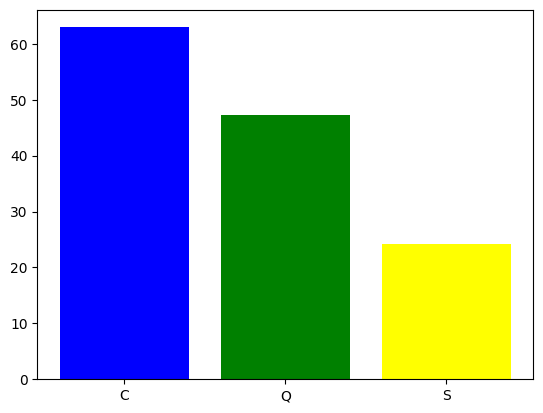

In [175]:
data_e = {'Embarked': ['C', 'Q', 'S'],
        'Survived%': [s_embarked_C, s_embarked_Q, s_embarked_S]}
df_survival_percentage_e = pd.DataFrame(data_e)

plt.bar(df_survival_percentage_e['Embarked'], df_survival_percentage_pclass['Survived%'], color=['blue', 'green', 'yellow'])

In [176]:
total_passengers = train_df.shape[0]
survival_percentage = train_df.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()
percentage_distribution = survival_percentage.div(survival_percentage.sum(axis=1), axis=0)
percentage_distribution

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

In total, on the Titanic, if we take the division by gender, there were 577 men and 314 women on board. That makes it 64 percent male and 36 percent female. Of which 74 percent of women survived, and in turn men survived only 18 percent. So gender will strongly influence the probability of survival.
If we look at Pclass, the most people were in class 3, then class 1, and then class 2. If you take it by percentage of survival, the largest percentage was in Pclass 2 with 62 percent survivors. The second class had 47 percent survivors, and the third class had 24 percent survivors.

In terms of age, the largest number of people tend to be in the average age range of 25-35 years. They also have the highest mortality rates as a percentage of the population

Looking at Embarked, Southampton had the highest number of people landed, however Cherbourg had the highest survival rate at 55, the other landing sites between 30 and 38% survived

Thus it can be seen from the summary table that women survived with 90 percent probability in the first and second classes, and in the third class the situation is 50/50. Men, in turn, survived in very small percentages in all classes, but the highest survival rate in the first class was 36 percent.

Thus for analysis we can take: Sex, Age, Pclass, Embarked


## <a id='50'>Split the data</a>  

Let's split the training and validation set. We will use a 80-20 split. Don't forget to fix random_state. 


#### Data preprocessing

In [178]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()
train_df["Sex"]= le.fit_transform(train_df["Sex"])
train_df['Embarked'] =train_df['Embarked'].fillna('S') 
train_df['Embarked']= le.fit_transform(train_df['Embarked'])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In this step, we fill in missing variables in age with the median value, and fill in missing values in Embarked with S - Southampton

We use LabelEncoder to encode the categorical variables gender and Embarked because we generally don't care about ordinality, and we have a small number of subcategories within a category

In [179]:
train_df['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [180]:
#your code is here
train, validation = train_test_split(train_df, random_state=42, test_size=0.2)
print(train.shape, validation.shape)

(712, 8) (179, 8)



## <a id='51'>Build a model</a>  

We will start with a simple model (baseline), with just two features, the `Sex` and `Pclass`. Create DesicionTreeClassifier and RandomForestClassifier, based on this features, without tuning parameters. 

Next, create two more complicated models: DesicionTreeClassifier and RandomForestClassifier with adding at least one feature you found useful as a result of your analysis.

Find accuracy score for all models. Is it a good idea to use accuracy? Any suggestions about metrics? 

Then try to tune at least one parameter for every model using grid search and write down features and parameters, which gave you best score. 

In [198]:
from sklearn.metrics import accuracy_score
def accuracy_test(clf, y_train, X_train, y_test, X_test):
    y_train_predict = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_train_predict)
    accuracy_tst = accuracy_score(y_test, y_pred) 
    print(f'{clf} shows {accuracy_train:.4f} on train sample')
    print(f'{clf} shows {accuracy_tst:.4f} on test sample')

#### DecisionTree simple model

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

y = train['Survived']
X = train[['Sex', 'Pclass']]

clf_simple_decision_tree = DecisionTreeClassifier(random_state=42)

clf_simple_decision_tree.fit(X, y)

accuracy_test(clf = clf_simple_decision_tree, y_train=y, X_train=X, y_test=validation['Survived'], X_test=validation[['Sex', 'Pclass']])

DecisionTreeClassifier(random_state=42) shows 0.7921 on train sample
DecisionTreeClassifier(random_state=42) shows 0.7654 on test sample


#### Random forest simple model

In [200]:
clf_random_forest_simple = RandomForestClassifier(random_state=42)

clf_random_forest_simple.fit(X, y)

accuracy_test(clf = clf_random_forest_simple, y_train=y, X_train=X, y_test=validation['Survived'], X_test=validation[['Sex', 'Pclass']])

RandomForestClassifier(random_state=42) shows 0.7921 on train sample
RandomForestClassifier(random_state=42) shows 0.7654 on test sample


#### DecisionTree simple model with Age

In [203]:
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age']]

clf_decision_tree_age = DecisionTreeClassifier(random_state=42)

clf_decision_tree_age.fit(X, y)

accuracy_test(clf = clf_decision_tree_age, y_train=y, X_train=X, y_test=validation['Survived'], X_test=validation[['Sex', 'Pclass', 'Age']])

DecisionTreeClassifier(random_state=42) shows 0.8750 on train sample
DecisionTreeClassifier(random_state=42) shows 0.7765 on test sample


#### Random forest simple model with age

In [206]:
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age']]

clf_random_forest_age = RandomForestClassifier(random_state=42)

clf_random_forest_age.fit(X, y)

accuracy_test(clf = clf_random_forest_age, y_train=y, X_train=X, y_test=validation['Survived'], X_test=validation[['Sex', 'Pclass', 'Age']])

RandomForestClassifier(random_state=42) shows 0.8750 on train sample
RandomForestClassifier(random_state=42) shows 0.7933 on test sample


Make a function to do test quickly on test train samples

In [209]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_stats(clf, y_train, X_train, y_test, X_test):
    y_train_predict = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_predict)
    accuracy_tst = accuracy_score(y_test, y_pred) 
    print(f'{clf} shows accuracy {accuracy_train:.4f} on train sample')
    print(f'{clf} shows accuracy {accuracy_tst:.4f} on test sample')

    precision_train = precision_score(y_train, y_train_predict)
    precision_test = precision_score(y_test, y_pred)
    print(f'{clf} shows precision {precision_train:.4f} on train sample')
    print(f'{clf} shows precision {precision_test:.4f} on test sample')

    recall_train = recall_score(y_train, y_train_predict)
    recall_test = recall_score(y_test, y_pred) 
    print(f'{clf} shows recall {recall_train:.4f} on train sample')
    print(f'{clf} shows recall {recall_test:.4f} on test sample')

    f1_train = f1_score(y_train, y_train_predict)
    f1_test = f1_score(y_test, y_pred)
    print(f'{clf} shows f1 {f1_train:.4f} on train sample')
    print(f'{clf} shows f1 {f1_test:.4f} on test sample')

    roc_auc_train = roc_auc_score(y_train, y_train_predict)
    roc_auc_test = roc_auc_score(y_test, y_pred)
    print(f'{clf} shows roc-auc {roc_auc_train:.4f} on train sample')
    print(f'{clf} shows roc-auc {roc_auc_test:.4f} on test sample')

Accuracy does not take into account the type of errors (false positives and false negatives). Especially in tasks where errors have different consequences, such as in this task, where a person's life depends on the result.

In the case of class imbalance, the model can only predict the dominant class, and the accuracy will be high even though the model is not efficient. In our example, there are more men than women, and in general this can introduce imbalances into the model

#### Precison

Formula: Precision = TP / (TP + FP), where TP is true positives, FP is false positives. This is important when the cost of false positives is high.

#### Recall
Formula: Recall = TP / (TP + FN), where TP is true positives and FN is false negatives. This is important when the cost of false negatives is high.

#### F1-score
Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall). This metric is useful when both accuracy and completeness are important.

In our model, recall should be improved because in general the model should not show many False Negative results, so it is better to increase recall

## Models with grid search

### Decision tree

In [218]:
from sklearn.model_selection import GridSearchCV
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]

gs_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={
                    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 8, 16],
                  },
                  cv=20,
                  scoring='precision')

gs_decision_tree.fit(X, y)
print("Best Parameters:", gs_decision_tree.best_params_)

best_gs_decision_tree = gs_decision_tree.best_estimator_

get_stats(clf = best_gs_decision_tree, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows accuracy 0.8315 on train sample
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows accuracy 0.7933 on test sample
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows precision 0.9022 on train sample
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows precision 0.8136 on test sample
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows recall 0.6194 on train sample
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10,
                       random_state=42) shows recall 0.6486 on

In [219]:
from sklearn.model_selection import GridSearchCV
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]

gs_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={
                    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 8, 16],
                  },
                  cv=20,
                  scoring='recall')

gs_decision_tree.fit(X, y)
print("Best Parameters:", gs_decision_tree.best_params_)

best_gs_decision_tree = gs_decision_tree.best_estimator_

get_stats(clf = best_gs_decision_tree, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows accuracy 0.8624 on train sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows accuracy 0.8101 on test sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows precision 0.9009 on train sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows precision 0.8030 on test sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows recall 0.7127 on train sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows recall 0.7162 on test sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows f1 0.7958 on train sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows f1 0.7571 on test sample
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows roc-auc 0.8327 on train sample
DecisionTreeClassifier(min_samples_leaf=4, random_sta

In [220]:
from sklearn.model_selection import GridSearchCV
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]

gs_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={
                    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4, 8, 16],
                  },
                  cv=20,
                  scoring='f1')

gs_decision_tree.fit(X, y)
print("Best Parameters:", gs_decision_tree.best_params_)

best_gs_decision_tree = gs_decision_tree.best_estimator_

get_stats(clf = best_gs_decision_tree, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters: {'max_depth': None, 'min_samples_leaf': 16, 'min_samples_split': 2}
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows accuracy 0.8301 on train sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows accuracy 0.7989 on test sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows precision 0.8356 on train sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows precision 0.8065 on test sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows recall 0.6828 on train sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows recall 0.6757 on test sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows f1 0.7515 on train sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows f1 0.7353 on test sample
DecisionTreeClassifier(min_samples_leaf=16, random_state=42) shows roc-auc 0.8009 on train sample
DecisionTreeClassifier(min_samples_leaf=16,

We got the best accuracy scores
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows accuracy 0.8101 on test sample
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2} 
Scoring - Recall

The best precision scores we got
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=10, random_state=42) shows precision 0.8136 on test sample
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}
Scoring precision

The best recall scores we've gotten
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows recall 0.7162 on test sample
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Scoring - Recall

The best performance on f1 we got
DecisionTreeClassifier(min_samples_leaf=4, random_state=42) shows f1 0.7571 on test sample
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Scoring - Recall

Thus the best model is the one that corresponds to 
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Scoring - Recall

it corresponds to the fact that we want to maximize recall without losing any of the other parameters.

### Random forest

In [223]:
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]
gs_random_forest = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
},
    cv=5,
    scoring='recall'
)

gs_random_forest.fit(X, y)
print("Best Parameters (Random Forest):", gs_random_forest.best_params_)

best_rf_model = gs_random_forest.best_estimator_
get_stats(clf = best_rf_model, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows accuracy 0.8961 on train sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows accuracy 0.7821 on test sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows precision 0.9145 on train sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows precision 0.7397 on test sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows recall 0.7985 on train sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows recall 0.7297 on test sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows f1 0.8526 on train sample
RandomForestClassifier(min_samples_split=5, n_estimators=200, random_st

In [224]:
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]
gs_random_forest = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
},
    cv=5,
    scoring='precision'
)

gs_random_forest.fit(X, y)
print("Best Parameters (Random Forest):", gs_random_forest.best_params_)

best_rf_model = gs_random_forest.best_estimator_
get_stats(clf = best_rf_model, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters (Random Forest): {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows accuracy 0.8315 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows accuracy 0.8045 on test sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows precision 0.9111 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows precision 0.8305 on test sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows recall 0.6119 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) show

In [225]:
y = train['Survived']
X = train[['Sex', 'Pclass', 'Age', 'Embarked']]
gs_random_forest = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16],
},
    cv=5,
    scoring='accuracy'
)

gs_random_forest.fit(X, y)
print("Best Parameters (Random Forest):", gs_random_forest.best_params_)

best_rf_model = gs_random_forest.best_estimator_
get_stats(clf = best_rf_model, y_train = y, X_train = X, y_test = validation['Survived'], X_test = validation[['Sex', 'Pclass', 'Age', 'Embarked']])

Best Parameters (Random Forest): {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows accuracy 0.8315 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows accuracy 0.8045 on test sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows precision 0.9111 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows precision 0.8305 on test sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows recall 0.6119 on train sample
RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) show

We got the best accuracy score





RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows accuracy 0.8045 on test sample



                       
Best Parameters (Random Forest): {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}                      

We got the best result on the precision

RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                       random_state=42) shows precision 0.8305 on test sample




                       
Best Parameters (Random Forest): {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

We got the best result on the recall

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42) shows recall 0.7297 on test sample

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Thus if we want to get the best recall, we should take a random forest model with parameters

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}